In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
try:
    data = pd.read_csv('kaggle.csv')
except FileNotFoundError:
    print("Error: 'new_file.csv' not found. Please ensure the file exists in the current directory.")
    exit()

In [4]:
%matplotlib inline

In [5]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
missing = data.isnull().sum()
missing 


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
dupli =  data.duplicated().sum()

dupli


np.int64(0)

In [10]:
for column in data.columns:
    zero_count = (data[column] == 0).sum()  # Calculate the number of zeros in the current column
    print(f"Zeros in column '{column}': {zero_count}")  # Output the zero count for each column

Zeros in column 'step': 0
Zeros in column 'type': 0
Zeros in column 'amount': 16
Zeros in column 'nameOrig': 0
Zeros in column 'oldbalanceOrg': 2102449
Zeros in column 'newbalanceOrig': 3609566
Zeros in column 'nameDest': 0
Zeros in column 'oldbalanceDest': 2704388
Zeros in column 'newbalanceDest': 2439433
Zeros in column 'isFraud': 6354407
Zeros in column 'isFlaggedFraud': 6362604


In [11]:
data = data[data['amount'] > 0].copy()

In [12]:
unique_values_type = data['type'].unique()  
unique_values_isFraud = data['isFraud'].unique()  
unique_values_isFlaggedFraud = data['isFlaggedFraud'].unique() 

# Display the unique values for each column
print("Unique values in 'type' column:", unique_values_type)
print("Unique values in 'isFraud' column:", unique_values_isFraud)
print("Unique values in 'isFlaggedFraud' column:", unique_values_isFlaggedFraud)

Unique values in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in 'isFraud' column: [0 1]
Unique values in 'isFlaggedFraud' column: [0 1]


In [13]:
data['type'] = data['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})

In [14]:
value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)

Value Counts:
 isFraud
0    6354407
1       8197
Name: count, dtype: int64


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_23384\914613664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')


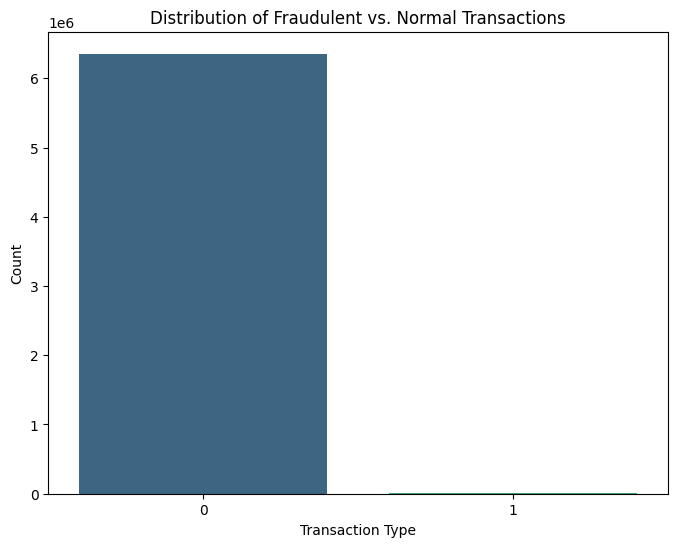

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions') 
plt.xlabel('Transaction Type') 
plt.ylabel('Count') 
plt.show()

Value Counts:
 type
0    2237484
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_23384\3439239032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')


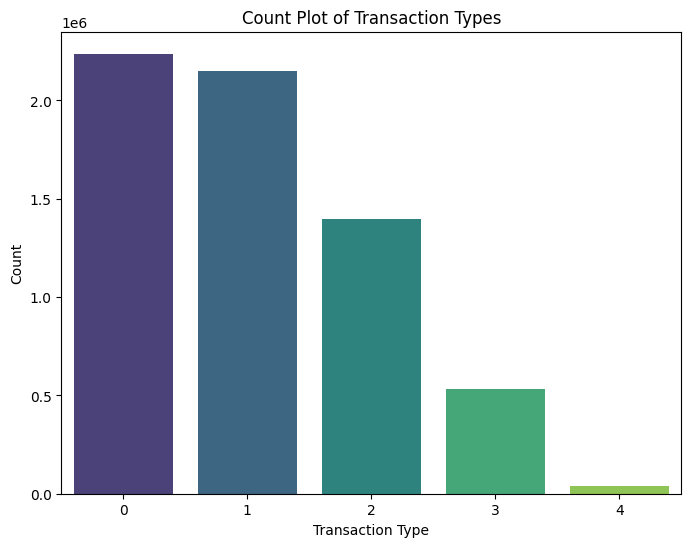

In [16]:
value_counts = data['type'].value_counts()
print("Value Counts:\n", value_counts)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

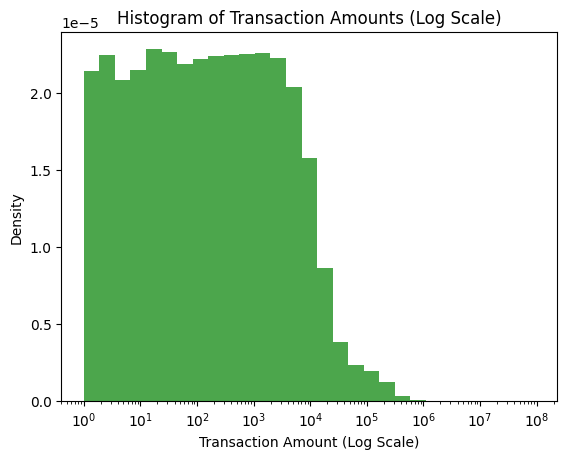

In [17]:
x_label = data['amount']

# since the previous histogram was scewed , we therefore decided to plot with log scale to get a better idea.
plt.hist(x_label, bins=np.logspace(np.log10(1), np.log10(x_label.max()), 30), density=True, color='green', alpha=0.7)
plt.xscale('log')  # Logarithmic x-axis
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Density')
plt.title('Histogram of Transaction Amounts (Log Scale)')
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (6362604, 5) instead

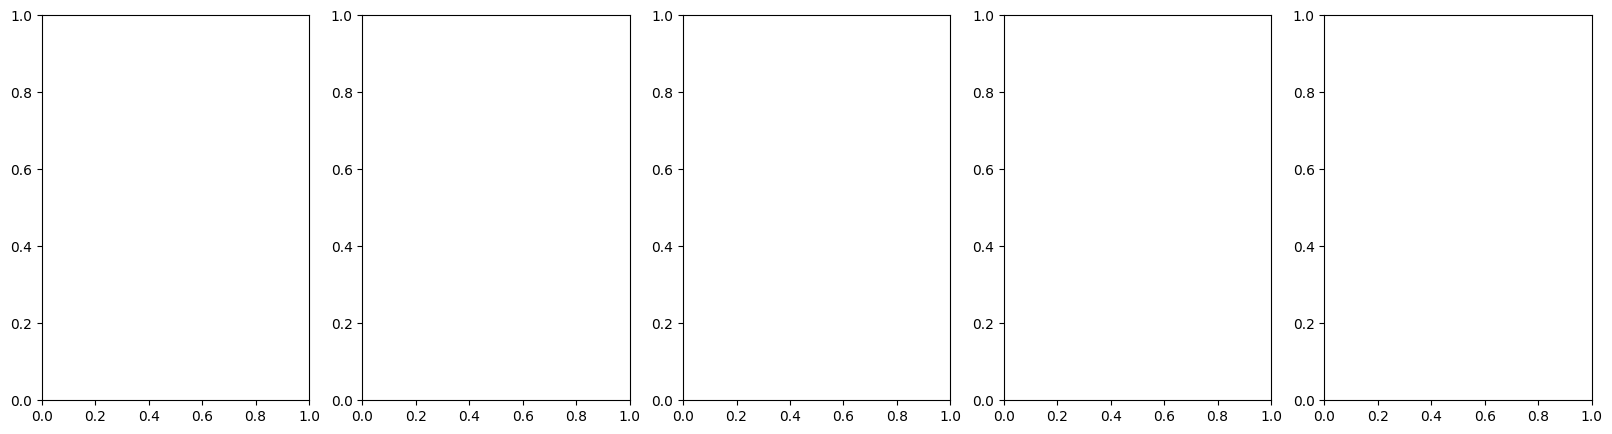

In [18]:
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))
for i, feature in enumerate(selected_features):
    sns.barplot(x=data['isFraud'], y=data[selected_features], hue=data['isFraud'], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs isFraud')  
    axes[i].set_xlabel('isFraud') 
    axes[i].set_ylabel(feature) 
    plt.subtitle("Comparison of Selected Features with Target (Bar Plot)", fontsize=16)
plt.tight_layout()  
plt.show()  

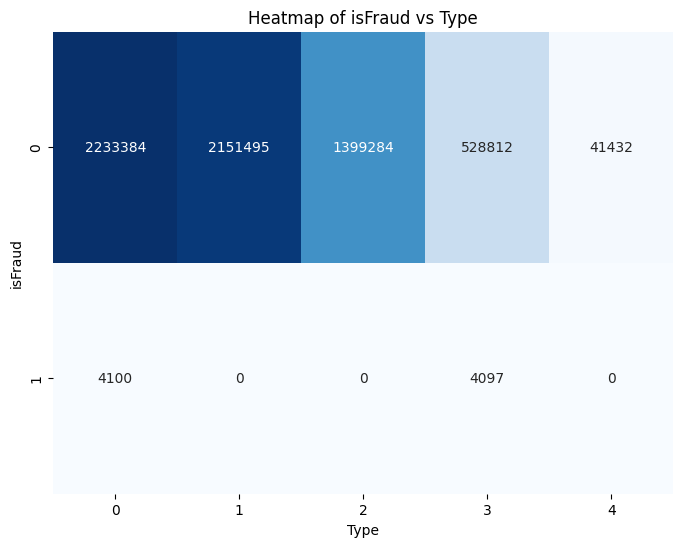

In [19]:
contingency_table = pd.crosstab(data['isFraud'], data['type'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Heatmap of isFraud vs Type')
plt.xlabel('Type')
plt.ylabel('isFraud')
plt.show()

In [20]:
transaction_type_weights = {
    0: 2.0,  
    1: 1.0,  
    2: 1.0,  
    3: 2.0,  
    4: 1.0 
}
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))

In [21]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
robust_scaler = RobustScaler()
data['amount_scaled'] = robust_scaler.fit_transform(data[['amount']])
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])
print(data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log',
                        'oldbalanceDest_log', 'newbalanceDest_log']].describe())

       amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
count   6.362604e+06       6.362604e+06        6.362604e+06   
mean    5.374923e-01       7.414592e+00        5.366105e+00   
std     3.091448e+00       5.669751e+00        6.330027e+00   
min    -3.833107e-01       0.000000e+00        0.000000e+00   
25%    -3.147621e-01       0.000000e+00        0.000000e+00   
50%     0.000000e+00       9.561672e+00        0.000000e+00   
75%     6.852379e-01       1.158354e+01        1.187937e+01   
max     4.728903e+02       1.790292e+01        1.771920e+01   

       oldbalanceDest_log  newbalanceDest_log  
count        6.362604e+06        6.362604e+06  
mean         7.722419e+00        8.330605e+00  
std          6.747638e+00        6.675096e+00  
min          0.000000e+00        0.000000e+00  
25%          0.000000e+00        0.000000e+00  
50%          1.179590e+01        1.227682e+01  
75%          1.375686e+01        1.392159e+01  
max          1.969049e+01        1.969094e+01  


In [22]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)
fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(
    columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}
)
fraud_rate['Fraud Rate'] = fraud_rate['Fraudulent Transactions'] / fraud_rate['Total Transactions']
fraud_rate = fraud_rate.reset_index()
print("Fraud Rate per Bin:")
print(fraud_rate)

Fraud Rate per Bin:
  amount_bin  Total Transactions  Fraudulent Transactions  Fraud Rate
0      0-100               14089                        2    0.000142
1    100-500               56987                       34    0.000597
2     500-1K               71554                        6    0.000084
3      1K-5K              559855                      104    0.000186
4     5K-10K              583590                      116    0.000199
5    10K-50K             1519856                      760    0.000500
6   50K-100K              719351                      669    0.000930
7      100K+             2706696                     3800    0.001404
8     1000K+              130626                     2706    0.020716


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_23384\3878476262.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(


In [24]:
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_23384\203919740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')


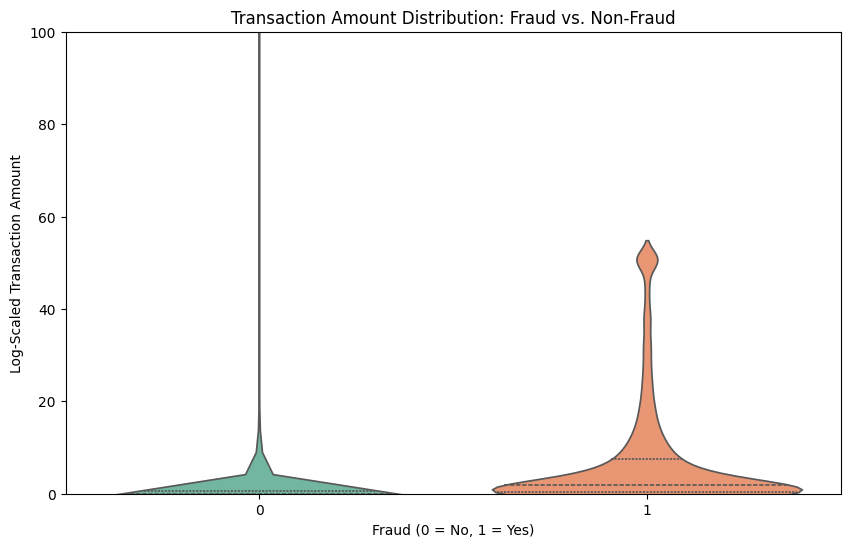

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')

plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Log-Scaled Transaction Amount")
plt.ylim(0, 100)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')

plt.title('Fraud Rate by Transaction Amount')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [25]:
data.head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_type_weight,amount_scaled,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log,amount_bin,bin_weight
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,1.0,-0.332937,12.044359,11.984786,0.000000,0.000000,5K-10K,1.0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1.0,-0.373767,9.964112,9.872292,0.000000,0.000000,1K-5K,1.0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,2.0,-0.382384,5.204007,0.000000,0.000000,0.000000,100-500,1.0
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,2.0,-0.382384,5.204007,0.000000,9.960954,0.000000,100-500,1.0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,1.0,-0.323576,10.634773,10.305174,0.000000,0.000000,10K-50K,1.0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,1.0,-0.343288,10.894162,10.737337,0.000000,0.000000,5K-10K,1.0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,1.0,-0.346923,12.118312,12.078740,0.000000,0.000000,5K-10K,1.0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,1.0,-0.343063,12.078740,12.033067,0.000000,0.000000,5K-10K,1.0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,1.0,-0.362708,7.890583,0.000000,0.000000,0.000000,1K-5K,1.0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,1.0,-0.355984,10.638760,10.501863,10.643017,10.605341,5K-10K,1.0
